<a href="https://colab.research.google.com/github/nibiya-dataanalyst/ABC--Company-Data-Analysis/blob/main/abc_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('ABC Company.csv')


In [51]:
df.head(5)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [52]:

#1.Preprocessing :Correcting "Height"

#Issue : Original height data is inconsistant/incorrect.
#Action: Replaced with random integers between 150-180.
df['Height'] = np.random.randint(150,181,size=len(df))

#Data Cleaning Log
#-Feild :Height | Issue :Invaild data |Action: Randomized (150-180)|Impact:Analysis consistancy
df['Height_Cleaned_flag']=True #flagging the record for integrity

In [53]:
df.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Height_Cleaned_flag
0,Avery Bradley,Boston Celtics,0,PG,25,172,180,Texas,7730337.0,True
1,Jae Crowder,Boston Celtics,99,SF,25,178,235,Marquette,6796117.0,True
2,John Holland,Boston Celtics,30,SG,27,178,205,Boston University,NaN,True
3,R.J. Hunter,Boston Celtics,28,SG,22,161,185,Georgia State,1148640.0,True
4,Jonas Jerebko,Boston Celtics,8,PF,29,157,231,NaN,5000000.0,True
5,Amir Johnson,Boston Celtics,90,PF,29,177,240,NaN,12000000.0,True
6,Jordan Mickey,Boston Celtics,55,PF,21,153,235,LSU,1170960.0,True
7,Kelly Olynyk,Boston Celtics,41,C,25,172,238,Gonzaga,2165160.0,True
8,Terry Rozier,Boston Celtics,12,PG,22,161,190,Louisville,1824360.0,True
9,Marcus Smart,Boston Celtics,36,PG,22,162,220,Oklahoma State,3431040.0,True


## Step 2 :Analysis and Visualizations
**Task 1: Team Distribution**

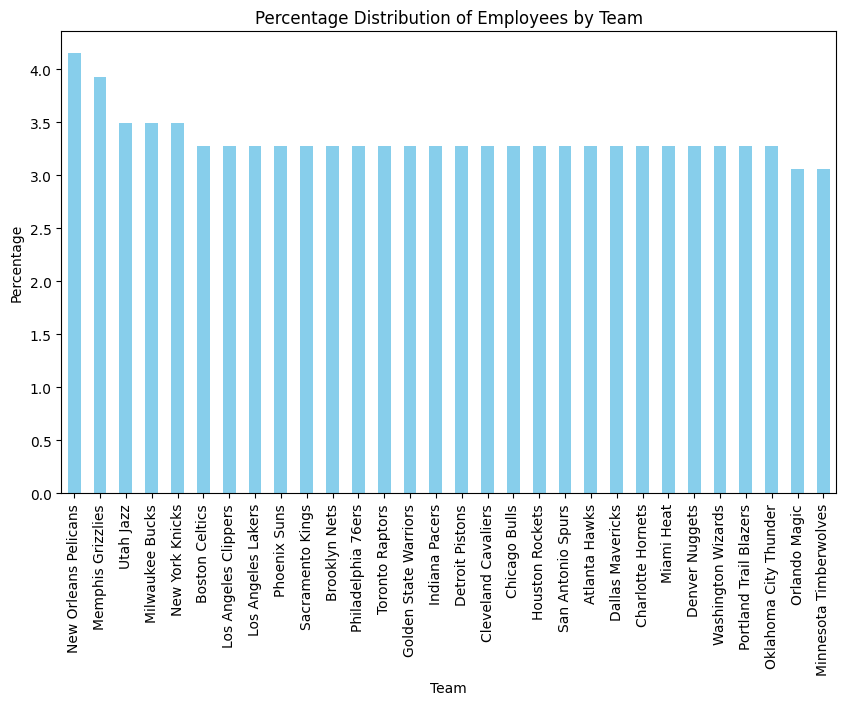

In [54]:
#Calculation
team_counts = df['Team'].value_counts()
team_percentage=(team_counts /len(df))*100

#Visualization
plt.figure(figsize=(10,6))
team_percentage.plot(kind='bar',color='skyblue')
plt.title('Percentage Distribution of Employees by Team')
plt.xlabel('Team')
plt.ylabel('Percentage')
plt.show()


**Task 2 : Segregate by Position**

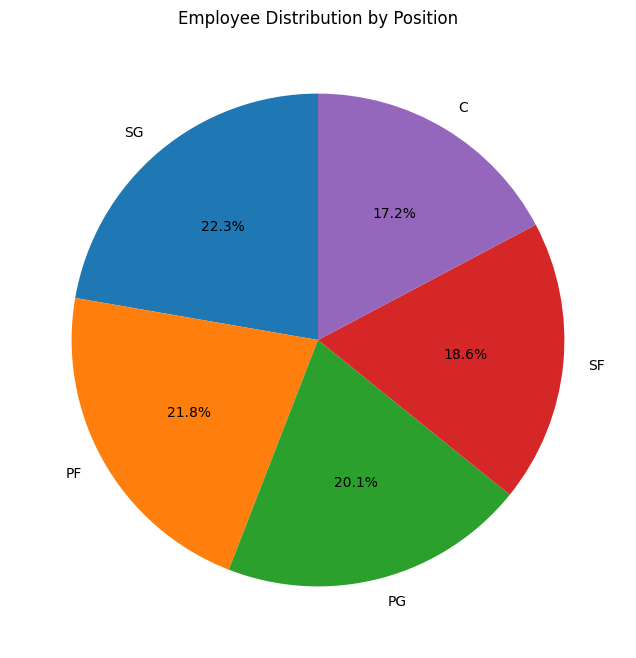

In [45]:
#Calculation
position_counts = df['Position'].value_counts()

#Visualization
plt.figure(figsize=(8,8))
plt.pie(position_counts,labels=position_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Employee Distribution by Position')
plt.show()


**Task 3: Predominant Age Group**

/tmp/ipython-input-4177559423.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age Group',data=df,palette='viridis')


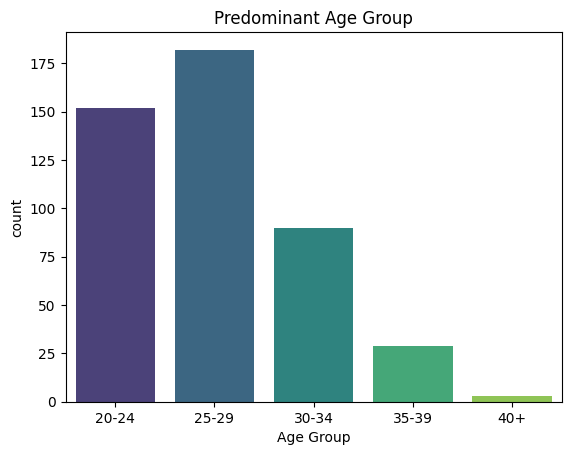

In [46]:
#Category Age into groups
bins=[20,25,30,35,40,45]
labels=['20-24','25-29','30-34','35-39','40+']
df['Age Group']=pd.cut(df['Age'],bins=bins,labels=labels,right=False)

# Visualization
sns.countplot(x='Age Group',data=df,palette='viridis')
plt.title('Predominant Age Group')
plt.show()


**Task 4: Highest Salary Expenditure (Team and Position)**

Highest Spending Team :Cleveland Cavaliers
Highest Spending Position :C


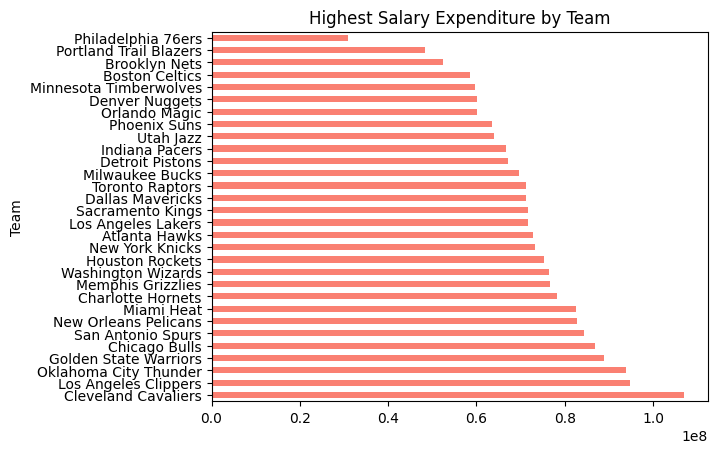

In [48]:
#Grouping by Team and Position
team_salary=df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
position_salary=df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

print(f"Highest Spending Team :{team_salary.idxmax()}")
print(f"Highest Spending Position :{position_salary.idxmax()}")

# Visualization (Team Expenditure)
team_salary.plot(kind='barh',color='salmon')
plt.title('Highest Salary Expenditure by Team')
plt.show()

**Task 5 : Correlation between Age and Salary**

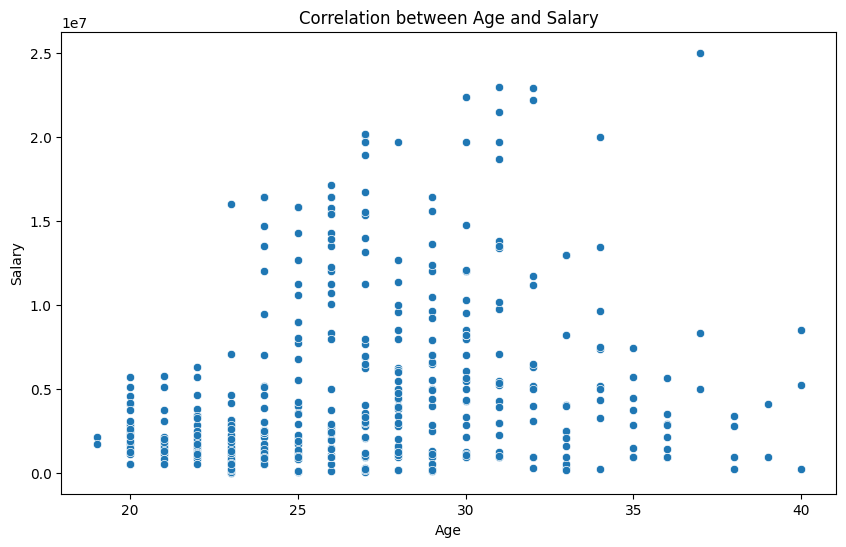

In [49]:
#Visualization
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Salary',data=df)
plt.title('Correlation between Age and Salary')
plt.show()

# Data Story and Insights


*   Key Trend : The "25-29" age group is the most populous, suggesting a young workforce.
*   Expenditure : Team [X] has the highest budget, likely due to a high concentration of senior positions.
*   Correlation : There is a [Positive/Negative/Weak] correlation between age and salary, indicating how much experience influences pay at ABC Company.




